análise de dados de fatura de cartão de crédito


##### Passo 01: ler as biblicotecas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

##### Passo 02: Ler a base de dados

In [4]:
dados = pd.read_csv("fatura.csv")
dados.head(10)

,Nome,NumeroCartao,data_compra,hora_compra,categoria,estabelecimento,ValorCompra
0,Ana,4745654042586681,2024-05-08,18:46:33,Vestuário,Loja de Roupas,53.21
1,Carlos,374149440690652,2024-04-22,03:00:47,Farmácia,Loja de Suplementos,159.70
2,Carlos,374149440690652,2024-05-16,22:19:36,Lazer,Show,114.56
3,Maria,374604561384428,2024-05-06,01:13:57,Mercado,Supermercado,101.21
4,Joao,2298930723413634,2024-04-18,02:08:58,Mercado,Mercado,32.03
5,Carlos,374149440690652,2024-04-21,03:17:30,Viagem,Hotel,23.37
6,Maria,374604561384428,2024-05-07,19:24:10,Eletrônicos,Loja de Eletrônicos,34.79
7,Maria,374604561384428,2024-05-11,10:05:53,Mercado,Mercado,259.72
8,Ana,4745654042586681,2024-04-01,02:07:42,Vestuário,Boutique,251.89
9,Maria,374604561384428,2024-05-04,01:10:51,Eletrônicos,Tecnologia,70.06


##### Valor total da fatura


In [5]:
valor_total_cartao = dados['ValorCompra'].sum()
valor_total_cartao

np.float64(14811.75)

##### Valor gasto por titular

In [6]:
valor_gasto_por_titular = dados.groupby('Nome')['ValorCompra'].sum()
valor_gasto_por_titular = dados.groupby("Nome")["ValorCompra"].sum().reset_index().sort_values(by="Nome",ascending=True)
valor_gasto_por_titular

,Nome,ValorCompra
0,Ana,5763.10
1,Carlos,3701.59
2,Joao,2562.15
3,Maria,2784.91


##### Valor gasto por categoria

In [7]:
valor_gasto_por_categoria = dados.groupby('categoria')['ValorCompra'].sum().reset_index().sort_values(by="ValorCompra",ascending=False)
valor_gasto_por_categoria 

,categoria,ValorCompra
0,Alimentação,2460.06
1,Eletrônicos,2350.01
5,Transporte,2186.05
7,Viagem,1893.79
6,Vestuário,1739.94
2,Farmácia,1714.60
4,Mercado,1495.00
3,Lazer,972.30


##### Dias que ocorreram gastos

In [8]:
gastos_por_dia = dados.groupby('data_compra')['ValorCompra'].sum().reset_index().sort_values(by="ValorCompra",ascending=False)
gastos_por_dia

,data_compra,ValorCompra
34,2024-05-08,807.59
27,2024-04-30,711.13
39,2024-05-13,641.62
22,2024-04-25,617.05
41,2024-05-15,595.99
4,2024-04-05,569.11
12,2024-04-15,564.96
19,2024-04-22,530.79
14,2024-04-17,513.50
28,2024-05-02,504.88


##### Grafico de gasto por pessoa

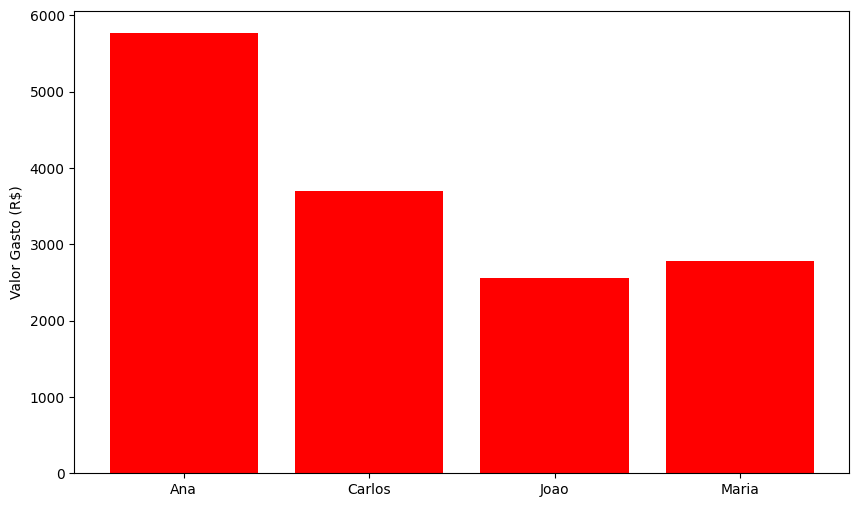

In [9]:
plt.figure(figsize=(10,6))
plt.bar( valor_gasto_por_titular ["Nome"], valor_gasto_por_titular ["ValorCompra"],color="red")
plt.title=("Valor Gasto por Titular")
plt.xlabel=("Titular")
plt.ylabel("Valor Gasto (R$)")
plt.xticks=("rotation=45")
plt.tight_layout=()
plt.show=()

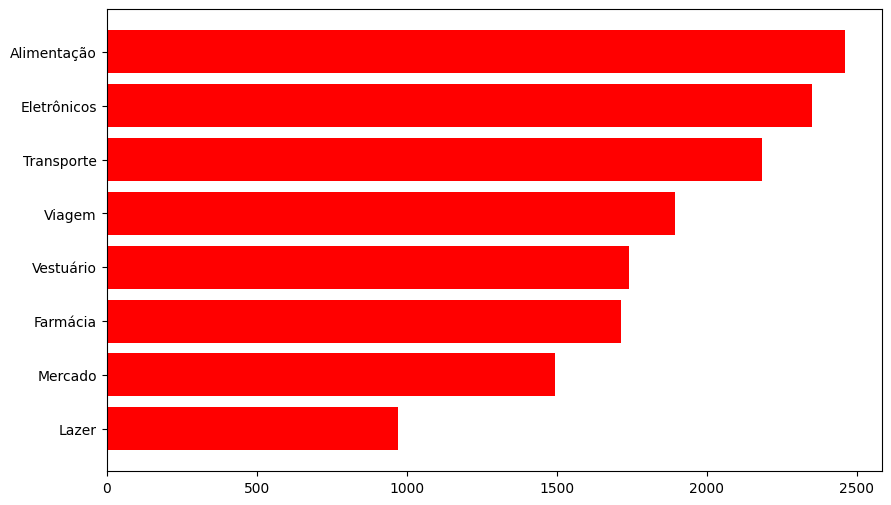

In [12]:
plt.figure(figsize=(10,6)) 
plt.barh(valor_gasto_por_categoria["categoria"], valor_gasto_por_categoria["ValorCompra"],color="red") 
plt.title=("Gasto por categoria")
plt.xlabel=("Valor da Compra")
plt.ylabel=("categoria") 
plt.gca().invert_yaxis() #inverte o eixo para mostrar as categorias dea maior valor no topo plt.show=()